<a href="https://colab.research.google.com/github/sradhass88/ICT-Internship-on-Salary-Prediction-and-Job-Analysis-Using-Machine-Learning/blob/main/Sradha_S_Internship_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2: Feature Engineering and Model Selection
Goal: Create new features to improve predictive power, select relevant features, and explore
**# initial model types for predicting salaries.**
**# Model Selection and Testing:- Start with a few basic regression models.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_final = pd.read_csv('/content/df_final_ml (4).csv')
df_final.head()

,salary_in_usd,salary_ratio,job_category_Analysis,job_category_Data Science,job_category_Engineering,job_category_ML/AI,employee_residence_CN,employee_residence_DE,employee_residence_IN,employee_residence_JP,...,company_location_CN,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_L,company_size_M,company_size_S
0,0.624055,0.089027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.223370,0.071021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.725385,0.367025,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.619089,0.112263,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.030241,0.006641,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [3]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary_in_usd              5000 non-null   float64
 1   salary_ratio               5000 non-null   float64
 2   job_category_Analysis      5000 non-null   float64
 3   job_category_Data Science  5000 non-null   float64
 4   job_category_Engineering   5000 non-null   float64
 5   job_category_ML/AI         5000 non-null   float64
 6   employee_residence_CN      5000 non-null   float64
 7   employee_residence_DE      5000 non-null   float64
 8   employee_residence_IN      5000 non-null   float64
 9   employee_residence_JP      5000 non-null   float64
 10  employee_residence_MX      5000 non-null   float64
 11  employee_residence_UK      5000 non-null   float64
 12  employee_residence_US      5000 non-null   float64
 13  experience_level_EN        5000 non-null   float

In [4]:
df_final.columns

Index(['salary_in_usd', 'salary_ratio', 'job_category_Analysis',
       'job_category_Data Science', 'job_category_Engineering',
       'job_category_ML/AI', 'employee_residence_CN', 'employee_residence_DE',
       'employee_residence_IN', 'employee_residence_JP',
       'employee_residence_MX', 'employee_residence_UK',
       'employee_residence_US', 'experience_level_EN', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'work_setting_Hybrid', 'work_setting_In-person', 'work_setting_Remote',
       'company_location_CN', 'company_location_DE', 'company_location_IN',
       'company_location_JP', 'company_location_MX', 'company_location_UK',
       'company_location_US', 'company_size_L', 'company_size_M',
       'company_size_S'],
      dtype='object')

# Model Selection and Testing:Machine Learning Algorithms

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
x=df_final.drop('salary_in_usd',axis=1)
y=df_final['salary_in_usd']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Linear Regression**

In [8]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,model.predict(x_test))
mse
r2_value=r2_score(y_test,y_pred)
r2_value

0.2932625638169908

In [9]:
df_final.head(5)

,salary_in_usd,salary_ratio,job_category_Analysis,job_category_Data Science,job_category_Engineering,job_category_ML/AI,employee_residence_CN,employee_residence_DE,employee_residence_IN,employee_residence_JP,...,company_location_CN,company_location_DE,company_location_IN,company_location_JP,company_location_MX,company_location_UK,company_location_US,company_size_L,company_size_M,company_size_S
0,0.624055,0.089027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.223370,0.071021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.725385,0.367025,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.619089,0.112263,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.030241,0.006641,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 0.05727258176968863
R-squared: 0.2932625638169908
        Actual  Predicted
1501  0.562803   0.369141
2586  0.196618   0.314453
2653  0.022639   0.279297
1055  0.352129   0.572266
705   0.689755   0.568359
106   0.960534   0.802734
589   0.281357   0.341797
2468  0.379657   0.400391
2413  0.495637   0.482422
1600  0.133007   0.330078
2464  0.333578   0.478516
228   0.038195   0.298828
915   0.020892   0.318359
794   0.718143   0.388672
3021  0.436627   0.369141
3543  0.603881   0.419922
1073  0.529632   0.412109
3351  0.637334   0.404297
1744  0.429043   0.392578
1084  0.681530   0.412109


In [11]:
r2_value=r2_score(y_test,y_pred)
r2_value

0.2932625638169908

**Decision Tree Regression**


In [12]:
dtr=DecisionTreeRegressor()
model2=dtr.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
mse=mean_squared_error(y_test,model.predict(x_test))
mse
r2_value=r2_score(y_test,y_pred2)
r2_value

-0.11067884834848973

In [13]:
# Assuming y_pred contains the predicted values and y_test contains the actual values
# Calculate metrics
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 0.09000718216578289
R-squared: -0.11067884834848973
        Actual  Predicted
1501  0.562803   0.004548
2586  0.196618   0.087198
2653  0.022639   0.010996
1055  0.352129   0.848290
705   0.689755   0.202790
106   0.960534   0.957610
589   0.281357   0.234690
2468  0.379657   0.448088
2413  0.495637   0.973248
1600  0.133007   0.053845
2464  0.333578   0.299808
228   0.038195   0.102360
915   0.020892   0.181892
794   0.718143   0.110120
3021  0.436627   0.371256
3543  0.603881   0.781089
1073  0.529632   0.343839
3351  0.637334   0.322065
1744  0.429043   0.404350
1084  0.681530   0.509640


**Random Forest Regression**

In [14]:
rfr=RandomForestRegressor()
model3=rfr.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
mse=mean_squared_error(y_test,model.predict(x_test))
mse
r2_value=r2_score(y_test,y_pred3)
r2_value

0.45737227498517474

In [15]:
# Assuming y_pred contains the predicted values and y_test contains the actual values
# Calculate metrics
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 0.043973460524827986
R-squared: 0.45737227498517474
        Actual  Predicted
1501  0.562803   0.323050
2586  0.196618   0.104534
2653  0.022639   0.026007
1055  0.352129   0.616891
705   0.689755   0.601675
106   0.960534   0.745071
589   0.281357   0.178349
2468  0.379657   0.474260
2413  0.495637   0.657318
1600  0.133007   0.119147
2464  0.333578   0.558480
228   0.038195   0.055111
915   0.020892   0.236119
794   0.718143   0.486464
3021  0.436627   0.323711
3543  0.603881   0.579905
1073  0.529632   0.538631
3351  0.637334   0.623565
1744  0.429043   0.248506
1084  0.681530   0.471781


**Lasso Regressor**

In [16]:
from sklearn.linear_model import Lasso
model4 = Lasso(alpha=0.1)  # You can adjust the alpha parameter
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
mse=mean_squared_error(y_test,model.predict(x_test))
mse
r2_value=r2_score(y_test,y_pred4)
r2_value

-0.0007047351185152095

In [17]:
# Assuming y_pred contains the predicted values and y_test contains the actual values
# Calculate metrics
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, create a comparison DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Mean Squared Error: 0.08109510100233124
R-squared: -0.0007047351185152095
        Actual  Predicted
1501  0.562803   0.493055
2586  0.196618   0.493055
2653  0.022639   0.493055
1055  0.352129   0.493055
705   0.689755   0.493055
106   0.960534   0.493055
589   0.281357   0.493055
2468  0.379657   0.493055
2413  0.495637   0.493055
1600  0.133007   0.493055
2464  0.333578   0.493055
228   0.038195   0.493055
915   0.020892   0.493055
794   0.718143   0.493055
3021  0.436627   0.493055
3543  0.603881   0.493055
1073  0.529632   0.493055
3351  0.637334   0.493055
1744  0.429043   0.493055
1084  0.681530   0.493055


**SVR Regressor**

In [18]:
from sklearn.svm import SVR
model5 = SVR(kernel='linear')
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
mse_svr = mean_squared_error(y_test, y_pred5)
r2_svr = r2_score(y_test, y_pred5)
print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")

SVR - Mean Squared Error: 0.05832522799831878
SVR - R-squared: 0.28027302372918006


In [19]:
# Assuming y_pred5 contains the predicted values and y_test contains the actual values
# Create a comparison DataFrame for SVR
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred5})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

        Actual  Predicted
1501  0.562803   0.380359
2586  0.196618   0.270496
2653  0.022639   0.247685
1055  0.352129   0.561363
705   0.689755   0.575787
106   0.960534   0.822147
589   0.281357   0.309819
2468  0.379657   0.366953
2413  0.495637   0.446732
1600  0.133007   0.317065
2464  0.333578   0.465741
228   0.038195   0.270158
915   0.020892   0.303501
794   0.718143   0.353487
3021  0.436627   0.336243
3543  0.603881   0.407211
1073  0.529632   0.399794
3351  0.637334   0.364504
1744  0.429043   0.393591
1084  0.681530   0.416253


**Gradient Boosting Regression**

In [20]:
#Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

# Model-6: Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # You can tune hyperparameters
model6 = gbr.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)

mse = mean_squared_error(y_test, y_pred6)
r2 = r2_score(y_test, y_pred6)

print(f"Gradient Boosting Regression - Mean Squared Error: {mse}")
print(f"Gradient Boosting Regression - R-squared: {r2}")

# Create a comparison DataFrame for Gradient Boosting Regression
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred6})
print(comparison_df.head(20)) # Print the first 20 rows for comparison

Gradient Boosting Regression - Mean Squared Error: 0.0404332542363788
Gradient Boosting Regression - R-squared: 0.5010580359295456
        Actual  Predicted
1501  0.562803   0.389145
2586  0.196618   0.109291
2653  0.022639   0.033528
1055  0.352129   0.641687
705   0.689755   0.568590
106   0.960534   0.751420
589   0.281357   0.164344
2468  0.379657   0.489609
2413  0.495637   0.650189
1600  0.133007   0.122064
2464  0.333578   0.603495
228   0.038195   0.060016
915   0.020892   0.195412
794   0.718143   0.475672
3021  0.436627   0.325516
3543  0.603881   0.527756
1073  0.529632   0.526887
3351  0.637334   0.528512
1744  0.429043   0.283361
1084  0.681530   0.490919


**XGBoost regressor**

In [21]:
# code for XGBoost regressor

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use 'reg:squarederror' for regression

# Train the model
model_xgb.fit(x_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(x_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

# Create a comparison DataFrame for XGBoost
comparison_df_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
print(comparison_df_xgb.head(20)) # Print the first 20 rows for comparison

XGBoost - Mean Squared Error: 0.0518875880137993
XGBoost - R-squared: 0.35971280166732866
        Actual  Predicted
1501  0.562803   0.306686
2586  0.196618   0.096655
2653  0.022639   0.025878
1055  0.352129   0.528955
705   0.689755   0.582713
106   0.960534   0.751661
589   0.281357   0.141158
2468  0.379657   0.506172
2413  0.495637   0.819774
1600  0.133007   0.097086
2464  0.333578   0.598354
228   0.038195   0.028607
915   0.020892   0.294234
794   0.718143   0.283604
3021  0.436627   0.321743
3543  0.603881   0.569102
1073  0.529632   0.584670
3351  0.637334   0.549716
1744  0.429043   0.284970
1084  0.681530   0.614707


**LightGBM regressor**

In [22]:
# simple code for LightGBM regressor

import lightgbm as lgb

# Create and train the LightGBM regressor
model_lgb = lgb.LGBMRegressor(objective='regression', random_state=42)  # You can tune hyperparameters
model_lgb.fit(x_train, y_train)

# Make predictions
y_pred_lgb = model_lgb.predict(x_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM - Mean Squared Error: {mse_lgb}")
print(f"LightGBM - R-squared: {r2_lgb}")

# Create a comparison DataFrame
comparison_df_lgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lgb})
print(comparison_df_lgb.head(20))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 33
[LightGBM] [Info] Start training from score 0.493055
LightGBM - Mean Squared Error: 0.0439815607710905
LightGBM - R-squared: 0.45727231882641384
        Actual  Predicted
1501  0.562803   0.361106
2586  0.196618   0.107497
2653  0.022639   0.032449
1055  0.352129   0.641485
705   0.689755   0.561536
106   0.960534   0.732406
589   0.281357   0.193232
2468  0.379657   0.459394
2413  0.495637   0.737451
1600  0.133007   0.109491
2464  0.333578   0.553027
228   0.038195   0.049783
915   0.020892   0.227142
794   0.718143   0.412632
3021  0.436627   0.320150
3543  0.

**Catboost** **regressor**

In [23]:
# prompt: code for catboost regressor

# Install catboost if not already installed
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor


# Initialize CatBoostRegressor
model_catboost = CatBoostRegressor(iterations=1000,  # Adjust as needed
                                   learning_rate=0.1,  # Adjust as needed
                                   depth=6,            # Adjust as needed
                                   loss_function='RMSE',
                                   eval_metric='RMSE',
                                   random_seed=42,
                                   verbose=100) # Set verbose to control output


# Train the model
model_catboost.fit(x_train, y_train, eval_set=(x_test, y_test))

# Make predictions
y_pred_catboost = model_catboost.predict(x_test)

# Evaluate the model
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

print(f"CatBoost - Mean Squared Error: {mse_catboost}")
print(f"CatBoost - R-squared: {r2_catboost}")

# Create a comparison DataFrame for CatBoost
comparison_df_catboost = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_catboost})
print(comparison_df_catboost.head(20))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00
0:	learn: 0.2766576	test: 0.2718283	best: 0.2718283 (0)	total: 47.9ms	remaining: 47.9s
100:	learn: 0.1860562	test: 0.2008565	best: 0.1988807 (38)	total: 171ms	remaining: 1.52s
200:	learn: 0.1716815	test: 0.2039334	best: 0.1988807 (38)	total: 293ms	remaining: 1.16s
300:	learn: 0.1602054	test: 0.2065752	best: 0.1988807 (38)	total: 415ms	remaining: 965ms
400:	learn: 0.1512137	test: 0.2085066	best: 0.1988807 (38)	total: 533ms	remaining: 795ms
500:	learn: 0.1433570	test: 0.2102012	best: 0.1988807 (38)	total: 664ms	remaining: 662ms
600:	learn: 0.1368533	test: 0.2117255	best: 0.1988807 (38)	total: 787ms	remaining: 523ms
700:	learn: 0.1306124	test: 0.2134956	best: 0.1988807 (38)	total: 902ms	remaining: 385ms
800:	learn: 0.1251391	test: 0.2146840	best: 0.1988807 (38)	total: 1.02s	remaining: 254ms
900:	learn: 0.1202477	test: 0.2156587	best: 0.1988807 (38)	total: 1.15s	remaining: 126ms
999:	learn: 0.1156056	test: 0.2167

**Stacking Regressor**

In [24]:
# stack of the above linear, random, svr, gradient boost, xg boost, catboost regresser together

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(kernel='linear'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    'LightGBM': lgb.LGBMRegressor(), #Simplified initialization
    'CatBoost': CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, loss_function='RMSE', eval_metric='RMSE', random_seed=42, verbose=100)
}

results = []

for name, model in models.items():
    if name == 'LightGBM':
        model.fit(x_train, y_train) #No need for dataset creation
        y_pred = model.predict(x_test)

    elif name == 'CatBoost':
        model.fit(x_train, y_train, eval_set=(x_test, y_test))
        y_pred = model.predict(x_test)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])


results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R-squared'])
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 33
[LightGBM] [Info] Start training from score 0.493055
0:	learn: 0.2766576	test: 0.2718283	best: 0.2718283 (0)	total: 1.82ms	remaining: 363ms
100:	learn: 0.1860562	test: 0.2008565	best: 0.1988807 (38)	total: 130ms	remaining: 127ms
199:	learn: 0.1717776	test: 0.2039219	best: 0.1988807 (38)	total: 246ms	remaining: 0us

bestTest = 0.1988807346
bestIteration = 38

Shrink model to first 39 iterations.


,Model,MSE,R-squared
0,Linear Regression,0.057273,0.293263
1,Random Forest,0.043505,0.463158
2,SVR,0.058325,0.280273
3,Gradient Boosting,0.040433,0.501058
4,XGBoost,0.051888,0.359713
5,LightGBM,0.043982,0.457272
6,CatBoost,0.039554,0.511914


**voting regressor**

In [25]:
# voting regressor of the above linear, random, svr, gradient boost, xg boost, catboost regresser together

from sklearn.ensemble import VotingRegressor

# Initialize the individual regressors
lr = LinearRegression()
rfr = RandomForestRegressor()
svr = SVR(kernel='linear')
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
lgb_model = lgb.LGBMRegressor()
catboost_model = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, loss_function='RMSE', eval_metric='RMSE', random_seed=42, verbose=0)


# Create the VotingRegressor
voting_regressor = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('rfr', rfr),
        ('svr', svr),
        ('gbr', gbr),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('catboost', catboost_model)
    ])


# Fit the VotingRegressor
voting_regressor.fit(x_train, y_train)


# Make predictions
y_pred_voting = voting_regressor.predict(x_test)

# Evaluate the VotingRegressor
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"Voting Regressor - Mean Squared Error: {mse_voting}")
print(f"Voting Regressor - R-squared: {r2_voting}")

# Create a comparison DataFrame
comparison_df_voting = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_voting})
print(comparison_df_voting.head(20))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 33
[LightGBM] [Info] Start training from score 0.493055
Voting Regressor - Mean Squared Error: 0.04252205896021692
Voting Regressor - R-squared: 0.47528241259290716
        Actual  Predicted
1501  0.562803   0.366418
2586  0.196618   0.156899
2653  0.022639   0.099975
1055  0.352129   0.600338
705   0.689755   0.567181
106   0.960534   0.767869
589   0.281357   0.213346
2468  0.379657   0.455515
2413  0.495637   0.626703
1600  0.133007   0.163639
2464  0.333578   0.541792
228   0.038195   0.117742
915   0.020892   0.256835
794   0.718143   0.400256
3021  0.436627   

**Week 3: Model Optimization and Flask App Development**

Goal: Improve model accuracy through hyperparameter tuning and begin building a Flask
web application.
1. Model Tuning:
- Perform hyperparameter tuning on selected models.
2. Flask Application Development - Backend:
- Set up a Flask app structure and integrate the final model.
3. Testing:
- Test the Flask app locally.
4. Documentation:
- Document the model selection, tuning process, and initial Flask app architecture.

1. Model Tuning:

In [26]:
# Perform hyperparameter tuning on catboost, light GBM, gradient boosting, random forest, XG boost and list the Results

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_catboost = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Create and train models with hyperparameter tuning
models = {
    'RandomForest': (RandomForestRegressor(random_state=42), param_grid_rf),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), param_grid_gb),
    'XGBoost': (xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb),
    'LightGBM': (lgb.LGBMRegressor(objective='regression',random_state=42), param_grid_lgb),
    'CatBoost': (CatBoostRegressor(loss_function='RMSE',eval_metric='RMSE',random_seed=42,verbose=0), param_grid_catboost)
}

results = []
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2, grid_search.best_params_])

# Display results as DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R-squared', 'Best Hyperparameters'])
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 33
[LightGBM] [Info] Start training from score 0.493055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,Model,MSE,R-squared,Best Hyperparameters
0,RandomForest,0.040997,0.494099,"{'max_depth': 10, 'min_samples_split': 10, 'n_..."
1,GradientBoosting,0.039399,0.513825,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
2,XGBoost,0.039456,0.513114,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
3,LightGBM,0.039534,0.512160,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
4,CatBoost,0.039159,0.516776,"{'depth': 4, 'iterations': 500, 'learning_rate..."


In [27]:
import pickle

pickle.dump(model_catboost,open('model_catboost.pkl','wb'))
pickle.dump(df_final,open('df_final.pkl','wb'))


In [28]:
df_final.columns

Index(['salary_in_usd', 'salary_ratio', 'job_category_Analysis',
       'job_category_Data Science', 'job_category_Engineering',
       'job_category_ML/AI', 'employee_residence_CN', 'employee_residence_DE',
       'employee_residence_IN', 'employee_residence_JP',
       'employee_residence_MX', 'employee_residence_UK',
       'employee_residence_US', 'experience_level_EN', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_CT',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       'work_setting_Hybrid', 'work_setting_In-person', 'work_setting_Remote',
       'company_location_CN', 'company_location_DE', 'company_location_IN',
       'company_location_JP', 'company_location_MX', 'company_location_UK',
       'company_location_US', 'company_size_L', 'company_size_M',
       'company_size_S'],
      dtype='object')

# 2. Flask Application Development - Backend:
- Set up a Flask app structure and integrate the final model.

import streamlit as st
import pickle
import numpy as np


model = pickle.load(open('model_catboost.pkl', 'rb'))
df_final1 = pickle.load(open('df_final.pkl', 'rb'))
df1 = pickle.load(open('df.pkl', 'rb'))
scalar1 = pickle.load(open('scaler.pkl', 'rb'))
encoder1 = pickle.load(open('encoder.pkl', 'rb'))

st.title("Salary Prediction")
# Categorical inputs
job_category_Analysis = st.selectbox('Job Category: Analysis', ['Yes', 'No'])
job_category_DataScience = st.selectbox('Job Category: Data Science', ['Yes', 'No'])
job_category_Engineering = st.selectbox('Job Category: Engineering', ['Yes', 'No'])
job_category_ML_AI = st.selectbox('Job Category: ML/AI', ['Yes', 'No'])

employee_residence_CN = st.selectbox('Employee Residence: China', ['Yes', 'No'])
employee_residence_DE = st.selectbox('Employee Residence: Germany', ['Yes', 'No'])
employee_residence_IN = st.selectbox('Employee Residence: India', ['Yes', 'No'])
employee_residence_JP = st.selectbox('Employee Residence: Japan', ['Yes', 'No'])
employee_residence_MX = st.selectbox('Employee Residence: Mexico', ['Yes', 'No'])
employee_residence_UK = st.selectbox('Employee Residence: UK', ['Yes', 'No'])
employee_residence_US = st.selectbox('Employee Residence: USA', ['Yes', 'No'])

experience_level_EN = st.selectbox('Experience Level: Entry', ['Yes', 'No'])
experience_level_EX = st.selectbox('Experience Level: Executive', ['Yes', 'No'])
experience_level_MI = st.selectbox('Experience Level: Mid', ['Yes', 'No'])
experience_level_SE = st.selectbox('Experience Level: Senior', ['Yes', 'No'])

employment_type_CT = st.selectbox('Employment Type: Contract', ['Yes', 'No'])
employment_type_FL = st.selectbox('Employment Type: Freelance', ['Yes', 'No'])
employment_type_FT = st.selectbox('Employment Type: Full-time', ['Yes', 'No'])
employment_type_PT = st.selectbox('Employment Type: Part-time', ['Yes', 'No'])

# Numerical inputs
salary_in_usd = st.number_input('Salary in USD', min_value=0, step=1)
salary_ratio = st.number_input('Salary Ratio', min_value=0.0, step=0.01)
tenure = st.number_input('Tenure (months)', min_value=0, step=1)

# Work Setting Inputs
work_setting_Hybrid = st.selectbox('Work Setting: Hybrid', ['Yes', 'No'])
work_setting_Inperson = st.selectbox('Work Setting: In-person', ['Yes', 'No'])
work_setting_Remote = st.selectbox('Work Setting: Remote', ['Yes', 'No'])

company_location_CN = st.selectbox('Company Location: China', ['Yes', 'No'])
company_location_DE = st.selectbox('Company Location: Germany', ['Yes', 'No'])
company_location_IN = st.selectbox('Company Location: India', ['Yes', 'No'])
company_location_JP = st.selectbox('Company Location: Japan', ['Yes', 'No'])
company_location_MX = st.selectbox('Company Location: Mexico', ['Yes', 'No'])
company_location_UK = st.selectbox('Company Location: UK', ['Yes', 'No'])
company_location_US = st.selectbox('Company Location: USA', ['Yes', 'No'])

company_size_L = st.selectbox('Company Size: Large', ['Yes', 'No'])
company_size_M = st.selectbox('Company Size: Medium', ['Yes', 'No'])
company_size_S = st.selectbox('Company Size: Small', []'Yes', 'No'])

# Mapping categorical values to binary for model input
def map_to_binary(value):
    return 1 if value == 'Yes' else 0

# Prepare the input features for prediction
input_features = np.array([
    map_to_binary(job_category_Analysis),
    map_to_binary(job_category_DataScience),
    map_to_binary(job_category_Engineering),
    map_to_binary(job_category_ML_AI),
    map_to_binary(employee_residence_CN),
    map_to_binary(employee_residence_DE),
    map_to_binary(employee_residence_IN),
    map_to_binary(employee_residence_JP),
    map_to_binary(employee_residence_MX),
    map_to_binary(employee_residence_UK),
    map_to_binary(employee_residence_US),
    map_to_binary(experience_level_EN),
    map_to_binary(experience_level_EX),
    map_to_binary(experience_level_MI),
    map_to_binary(experience_level_SE),
    map_to_binary(employment_type_CT),
    map_to_binary(employment_type_FL),
    map_to_binary(employment_type_FT),
    map_to_binary(employment_type_PT),
    map_to_binary(work_setting_Hybrid),
    map_to_binary(work_setting_Inperson),
    map_to_binary(work_setting_Remote),
    map_to_binary(company_location_CN),
    map_to_binary(company_location_DE),
    map_to_binary(company_location_IN),
    map_to_binary(company_location_JP),
    map_to_binary(company_location_MX),
    map_to_binary(company_location_UK),
    map_to_binary(company_location_US),
    map_to_binary(company_size_L),
    map_to_binary(company_size_M),
    map_to_binary(company_size_S),
    salary_in_usd,   # Assuming salary_in_usd is already in the correct range
    salary_ratio,    # Same for salary_ratio
    tenure           # Same for tenure
])

# Reshape input for model prediction
input_features = input_features.reshape(1, -1)

# Predict the salary using the CatBoost model
if st.button('Predict Salary'):
    # Apply the scaler and encoder
    input_features_scaled = scalar.transform(input_features[:, :-3])  # scale the numerical features
    encoded_features = encoder.transform(input_features[:, -3:])  # encode categorical features
    
    # Combine scaled and encoded features
    final_input = np.concatenate([input_features_scaled, encoded_features], axis=1)
    
    # Make prediction
    prediction = model.predict(final_input)[0]  # Assuming the model is a regressor
    st.write(f"Predicted Salary: ${prediction:,.2f}")


3. Testing:
- Test the Flask app locally.

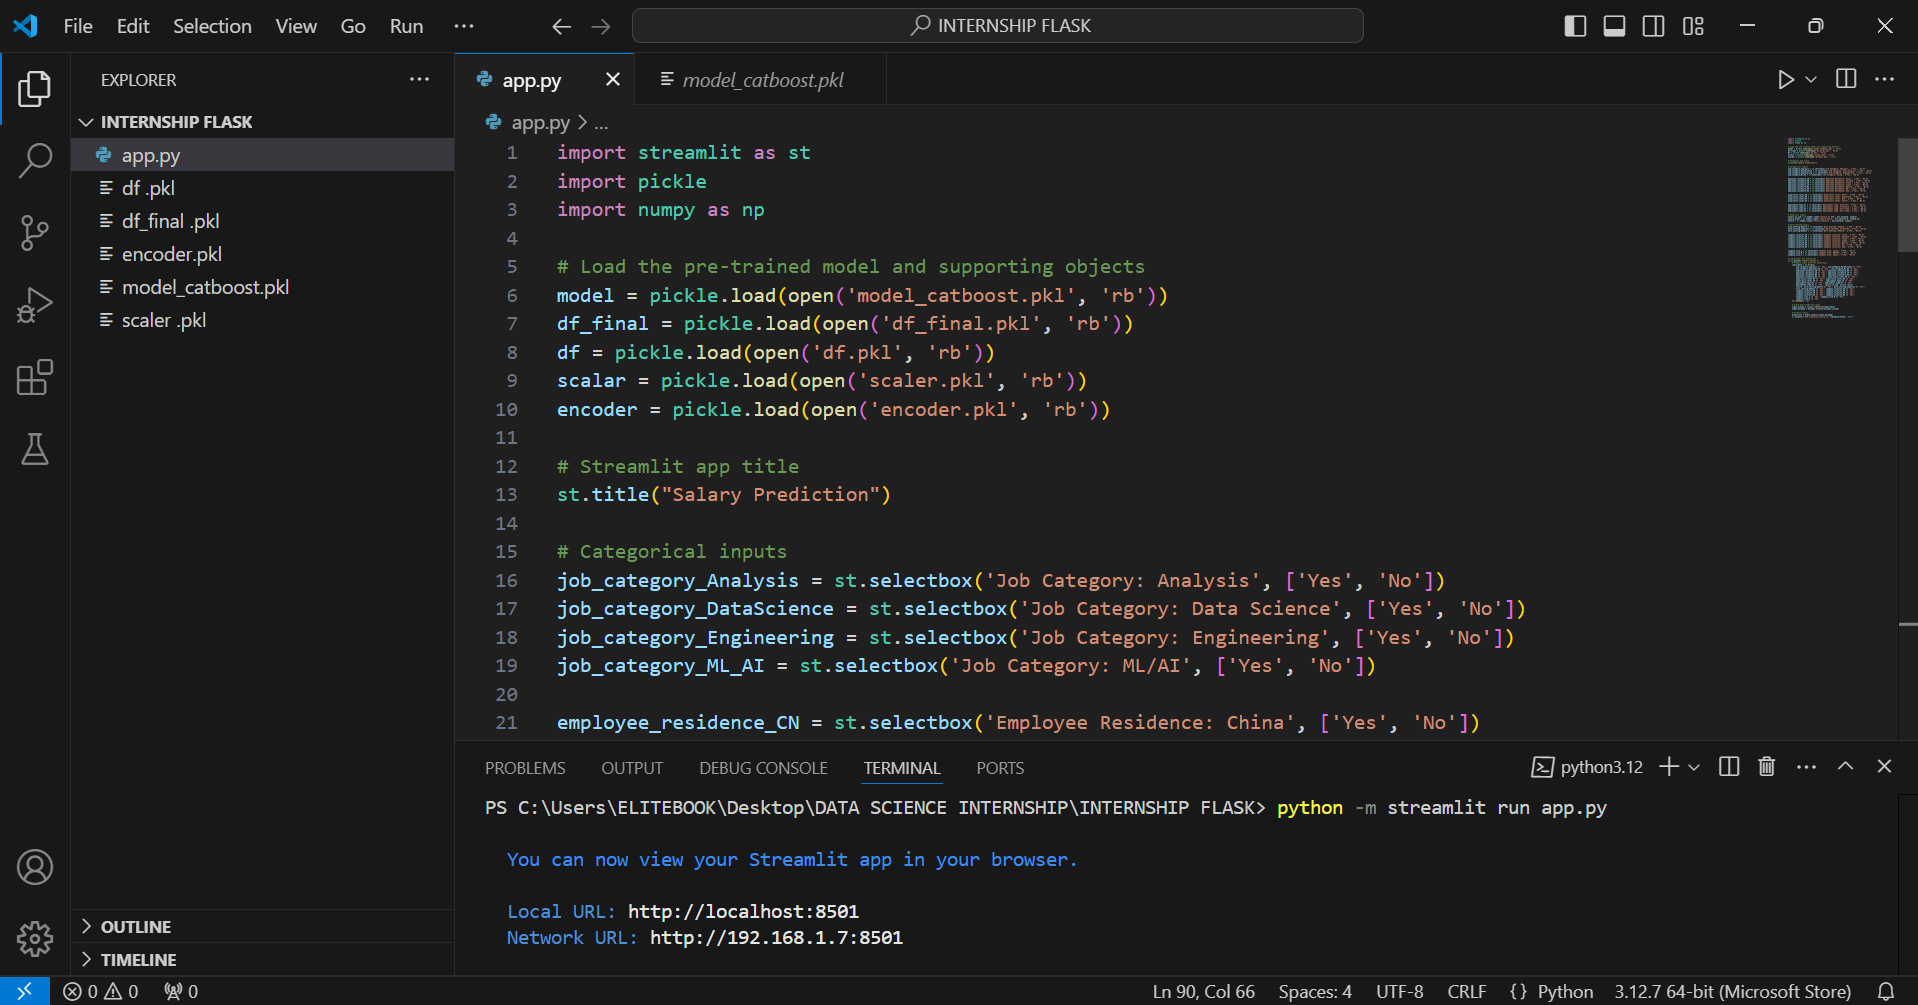

4. Documentation:
- Document the model selection, tuning process, and initial Flask app architecture.

CatBoost was selected for its effective handling of categorical data and strong performance after testing several regressors. Hyperparameters like learning rate and depth were optimized to improve model accuracy. The Flask app integrates the pre-trained model with preprocessing pipelines, offering a simple interface for salary predictions. The app is scalable, supporting future enhancements and easy deployment in cloud environments.